I scattered the whole training dataset, I'm gonna see what different dimensionality reduction techniques look like. 

In [80]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [81]:
import numpy as np
import h5py
from os import path

In [82]:
from sklearn.decomposition import PCA, SparsePCA
from sklearn.manifold import TSNE

In [83]:
dirname = '/oak/stanford/orgs/kipac/users/swmclau2/Uatu/UatuLightconeTraining/'
fname = 'UatuLightconeTrainingScattered.hdf5'

In [84]:
n_per_box = 5
np.random.seed(64)

In [85]:
_maps = []
_cosmos = []

with h5py.File(path.join(dirname, fname), 'r') as f:
    for boxname in f.keys():

        _idxs = np.random.choice(289, size = n_per_box, replace=False)
        idxs = np.zeros((289,), dtype = bool)
        idxs[_idxs] = True
        _maps.append(f[boxname]['X'][idxs, :, :, :] )
        _cosmos.append(f[boxname]['Y'][0].squeeze())

In [86]:
maps = np.array(_maps)
cosmos = np.array(_cosmos)

In [87]:
cosmos = np.repeat(cosmos, n_per_box, axis = 0)

In [88]:
maps.shape

(200, 5, 81, 64, 64)

In [89]:
maps = maps.reshape((maps.shape[0]*maps.shape[1], -1))

In [90]:
n_components = 3

#p = PCA(n_components=n_components)
#p = SparsePCA(n_components=n_components)
p = TSNE(n_components=n_components)

In [91]:
t_maps = p.fit_transform(maps)

In [92]:
cosmos.shape

(1000, 2)

In [93]:
pal = sns.cubehelix_palette(cosmos.shape[0])#, as_cmap=True)

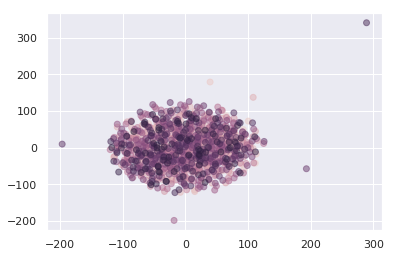

In [94]:
#for i, c in enumerate(pal):
plt.scatter(t_maps[:,0], t_maps[:,1], color = pal, alpha = 0.5)